In [128]:
# http://scikit-learn.org/dev/auto_examples/neighbors/plot_lof.html
# ToDo: different metrics  
    
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

Automatically created module for IPython interactive environment


In [139]:
import pandas as pd
df = pd.read_csv("outlier_dataset.csv", sep=' ', header=None)
df.dtypes
df.head()

,0,1
0,0.412560,0.582276
1,0.379856,0.507856
2,0.379528,0.512318
3,0.642490,0.681989
4,0.462998,0.327923


In [130]:
X = df.as_matrix()
X[:, 1].max()

0.89379514557200002

In [133]:
from math import sqrt
def euclid_dist(t1,t2):
    return sqrt(sum((t1-t2)**2))

l = len(df.index)
dd1 = np.zeros((l, l))
for x in range(l):
    for y in range(l):
        dd1[x][y] = euclid_dist(X[x], X[y]) if y > x else -1
        
dd2 = [[(dd1[x][y] if y > x else dd1[y][x])  for y in range(l)] for x in range(l)]

for i in range(l):
    dd2[i][i] = 0.0

In [90]:
df = pd.DataFrame(dd2)
df.values.max()

2.1010001293517835

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


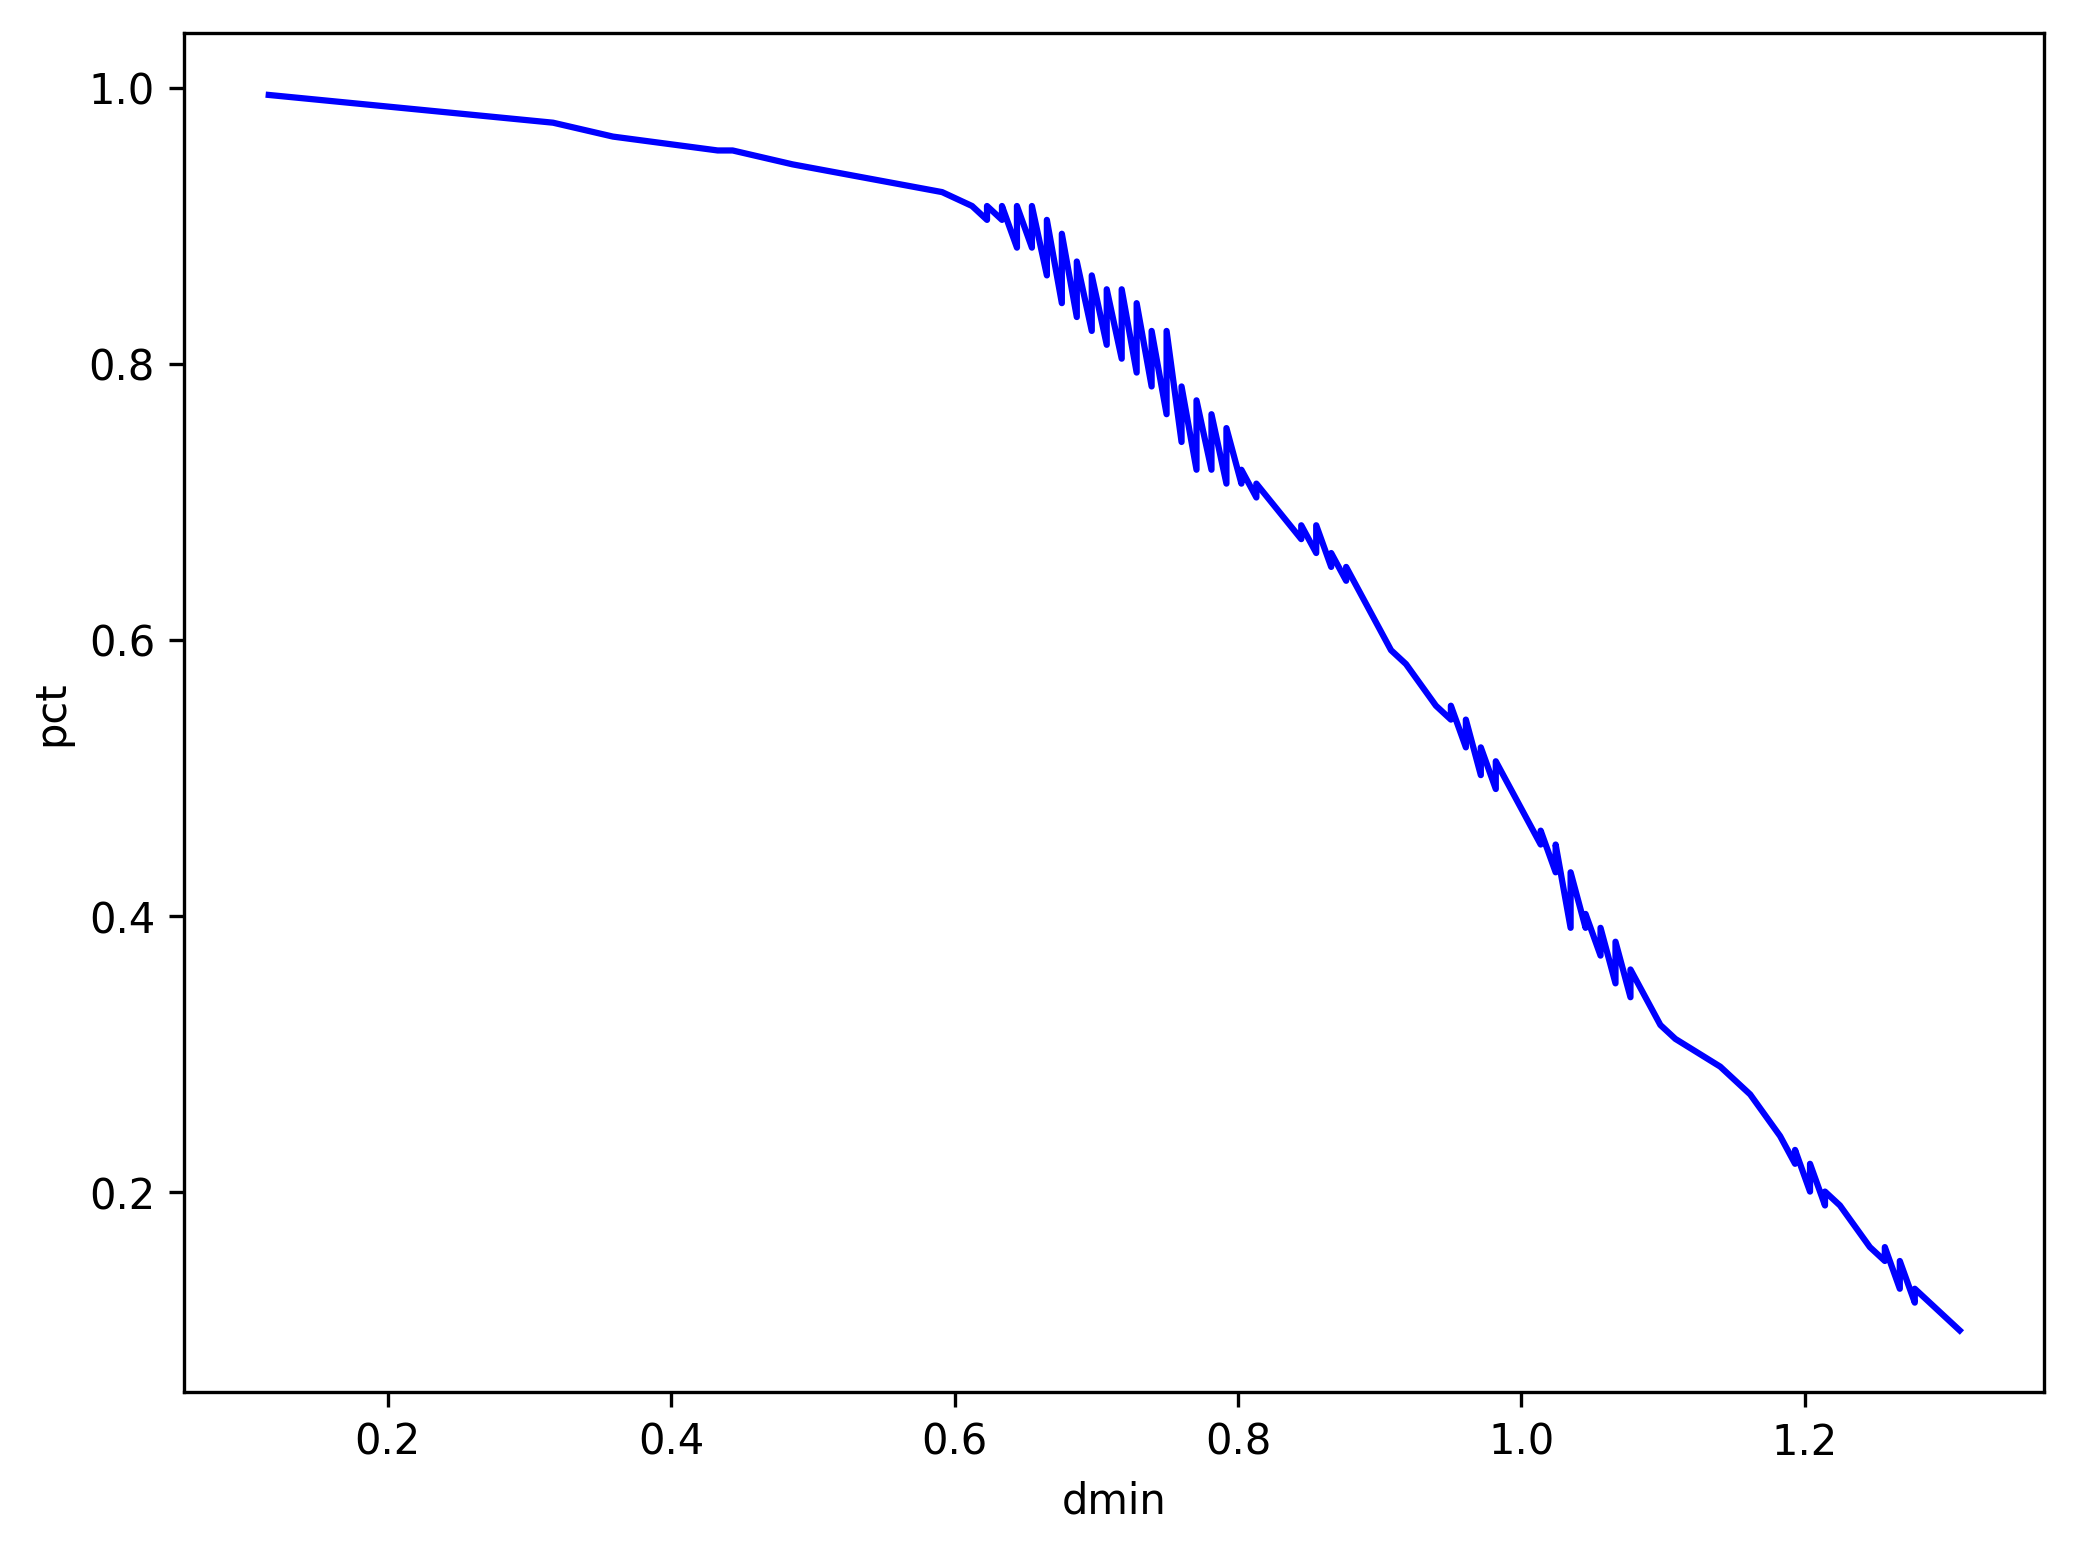

In [116]:
max = df.values.max()
dist = np.linspace(0, max, 200)
persentage = np.linspace(0.1, max, 200)
dd = list()
pp = list()
for d in dist:
    for p in persentage:
        counts = df[df.apply(lambda x: x > d)].count()
        outliers = df[counts.apply(lambda x: x/l >= p)].index
        if len(outliers) == 0.05 * l:
            print('d: {}'.format(d))
            print('p: {}'.format(p))
            dd.append(d)
            pp.append(p)
        
plt.close('all')
plt.figure(figsize=(8, 6))
plt.plot(dd, pp, 'b-')
plt.legend(loc='best')
plt.xlabel('dmin')
plt.ylabel('pct')
# plt.plot([0., 1.], [0.925, 0.925],'r--', linewidth=0.6)
# plt.plot([0.59, 0.59], [0., 1.], 'r--', linewidth=0.6)
plt.show()

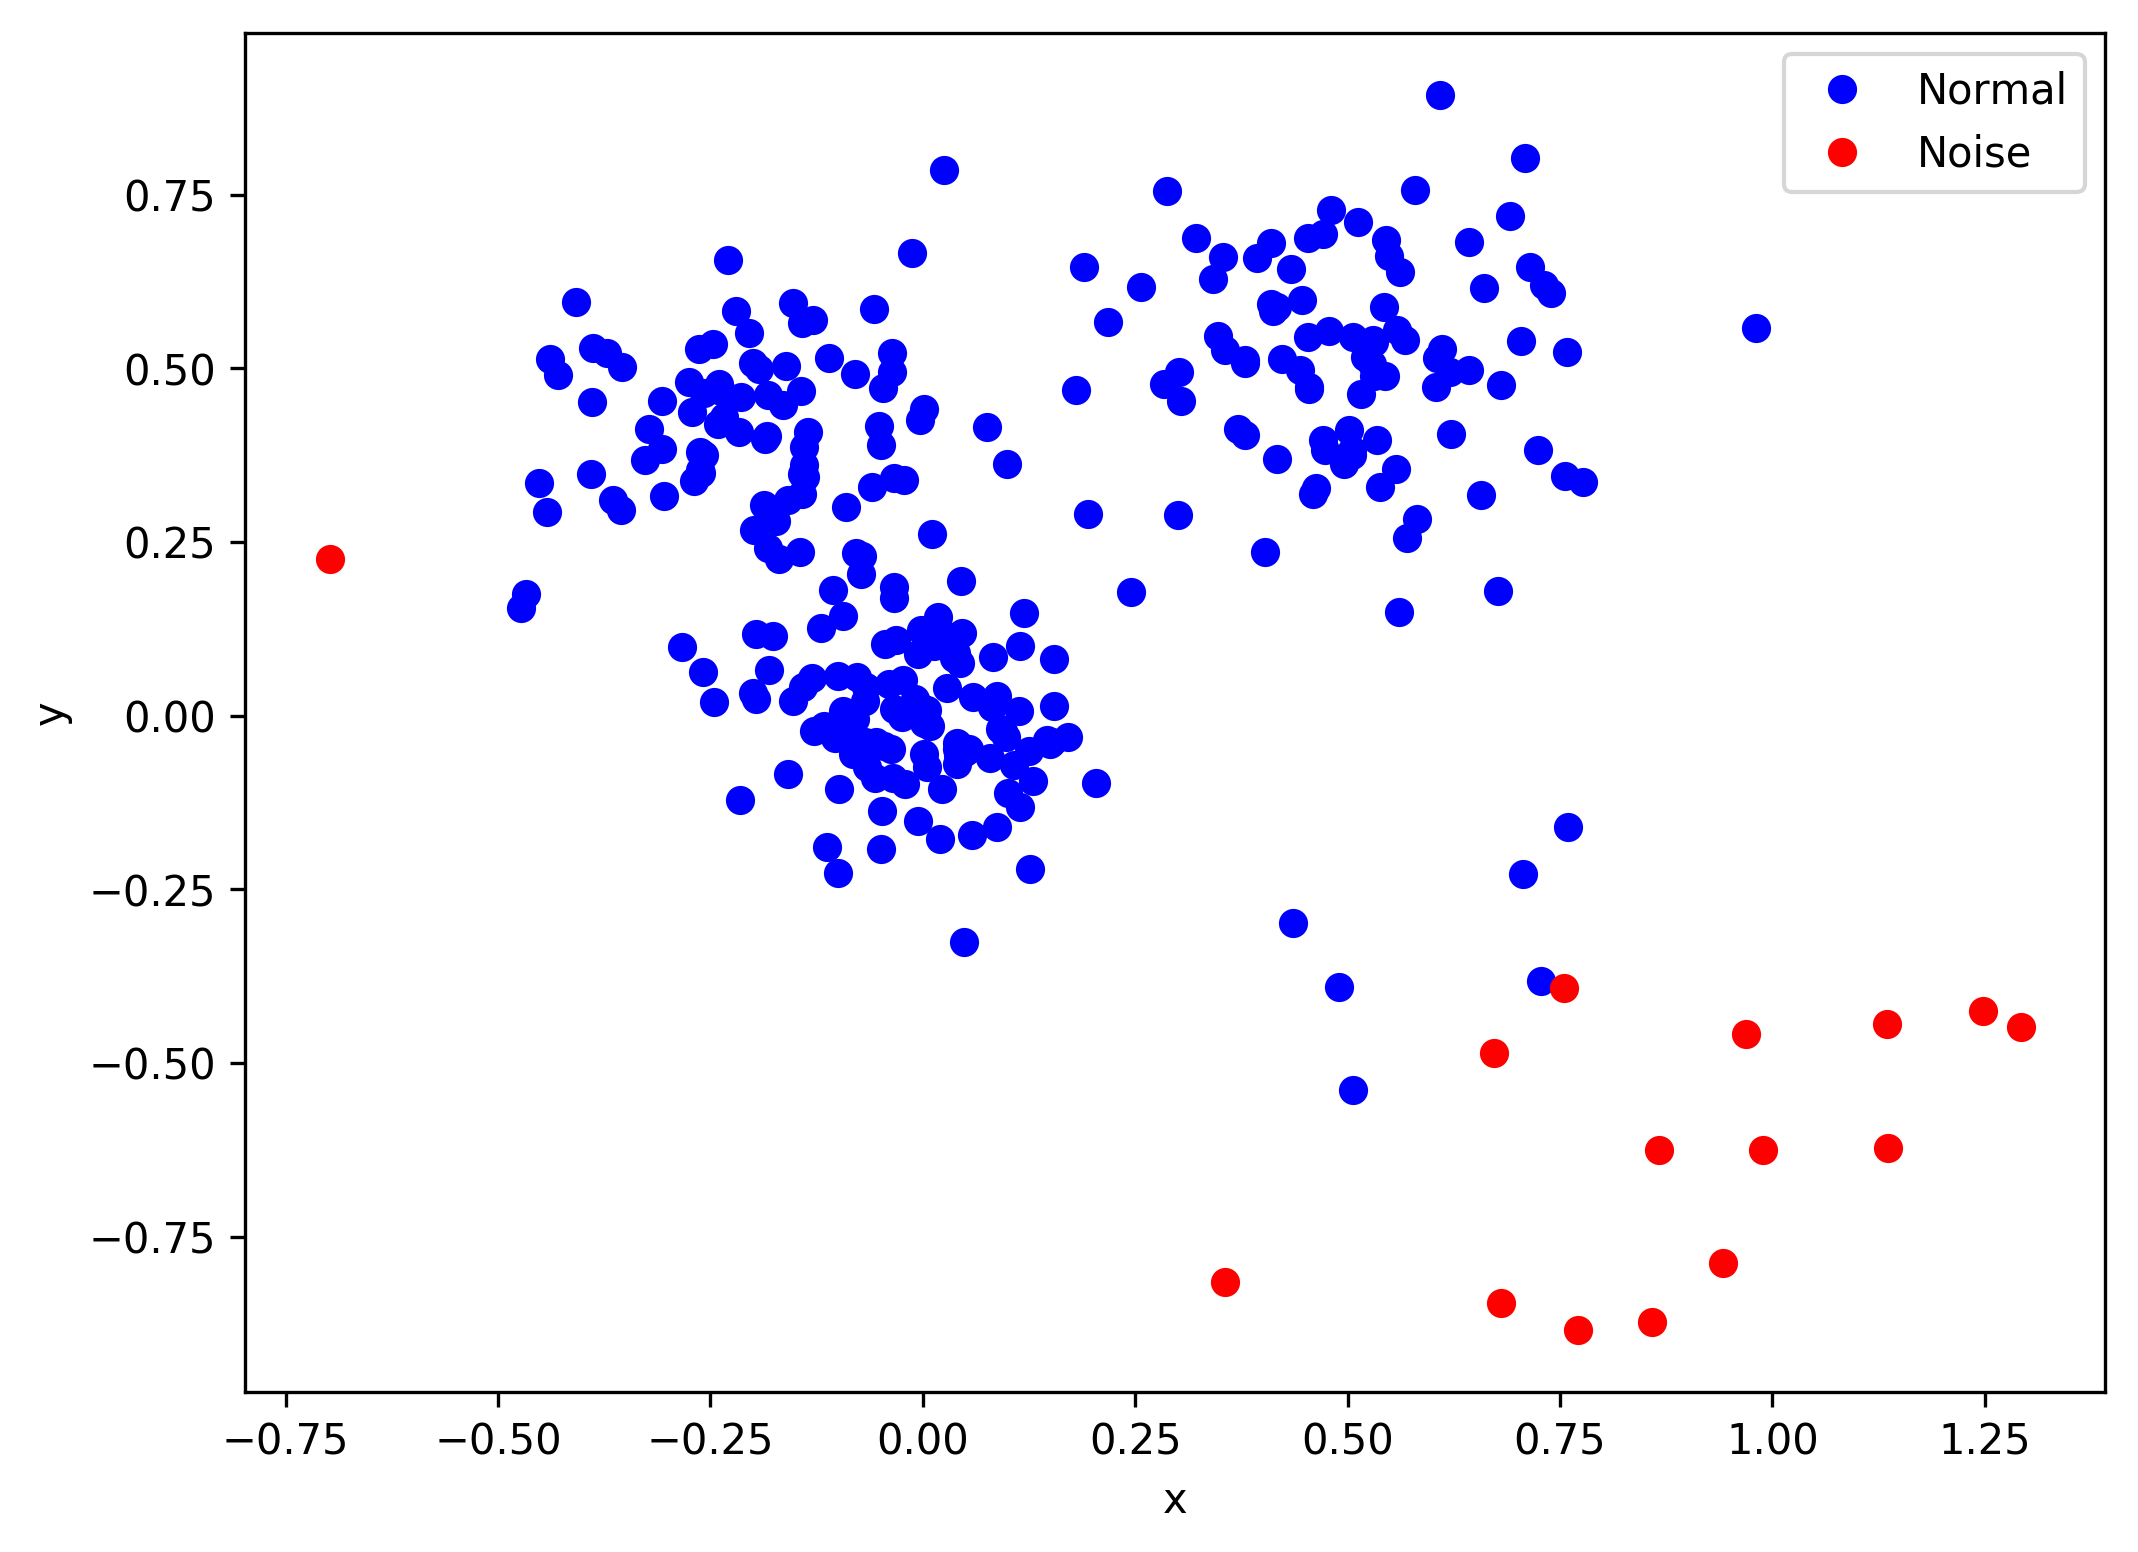

In [126]:
d = 0.11613568554205839
p = 0.9949196558407473

d = 0.6123517964944897
p = 0.9144774395853992

# d = 0.6862563236576178
# p = 0.8541457773938882

d = 1.2669347513679097
p = 0.14022110812767405

counts = df[df.apply(lambda x: x > d)].count()
outliers = df[counts.apply(lambda x: x/l >= p)].index

noise = np.array([ X[i] for i in outliers])
normal = np.array([X[i] for i in range(l) if i not in outliers])

plt.close('all')
plt.figure(figsize=(8, 6))
plt.plot(normal[:,0], normal[:,1], 'bo', label="Normal")
plt.plot(noise[:,0], noise[:,1], 'ro', label="Noise")
plt.legend(loc='best')
plt.ylabel('y')
plt.xlabel('x')
plt.show()